# 時系列データでCVをきる方法


In [3]:
from calendar import month_name

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



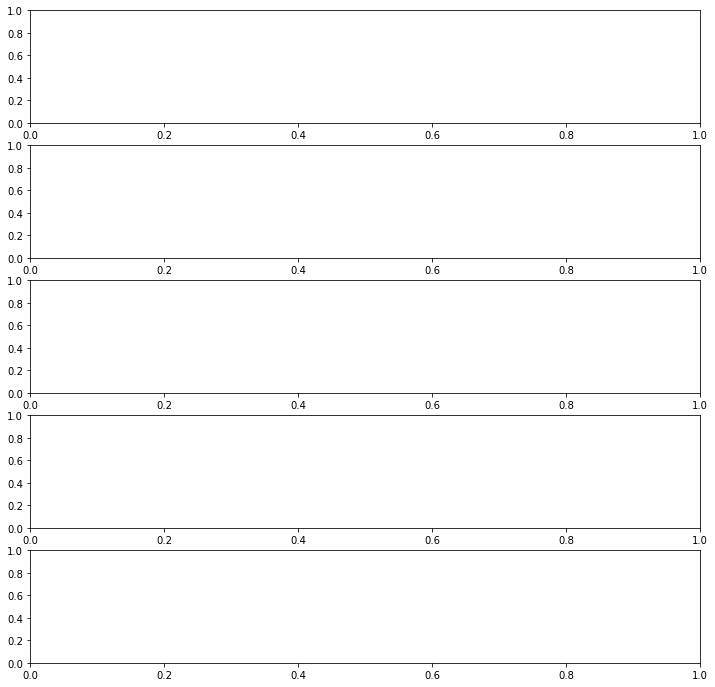

In [4]:
df = sns.load_dataset('flights')

# 時系列のカラムを用意する
month_name_mappings = {name[:3]: str(n).zfill(2) for n, name in enumerate(month_name)}

df['month'] = df['month'].apply(lambda x: month_name_mappings[x])
df['year-month'] = df.year.astype(str) + '-' + df.month.astype(str)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# データの並び順を元に分割する
folds = TimeSeriesSplit(n_splits=5)

# 5 枚のグラフを用意する
fig, axes = plt.subplots(5, 1, figsize=(12, 12))

In [5]:
df

,year,month,passengers,year-month
0,1949,01,112,1949-01-01
1,1949,02,118,1949-02-01
2,1949,03,132,1949-03-01
3,1949,04,129,1949-04-01
4,1949,05,121,1949-05-01
...,...,...,...,...
139,1960,08,606,1960-08-01
140,1960,09,508,1960-09-01
141,1960,10,461,1960-10-01
142,1960,11,390,1960-11-01


index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
index of test: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
index of test: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
index of test: [72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
----------
index of train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

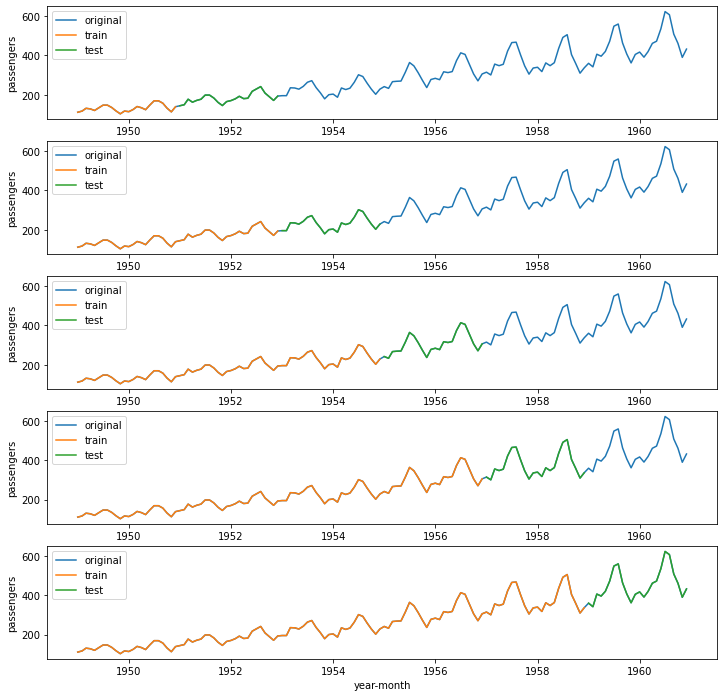

In [6]:
df = sns.load_dataset('flights')

# 時系列のカラムを用意する
month_name_mappings = {name[:3]: str(n).zfill(2) for n, name in enumerate(month_name)}

df['month'] = df['month'].apply(lambda x: month_name_mappings[x])
df['year-month'] = df.year.astype(str) + '-' + df.month.astype(str)
df['year-month'] = pd.to_datetime(df['year-month'], format='%Y-%m')

# データの並び順を元に分割する
folds = TimeSeriesSplit(n_splits=5)

# 5 枚のグラフを用意する
fig, axes = plt.subplots(5, 1, figsize=(12, 12))

for i, (train_index, test_index) in enumerate(folds.split(df)):
        # 生のインデックス
        print(f'index of train: {train_index}')
        print(f'index of test: {test_index}')
        print('----------')
        # 元のデータを描く
        sns.lineplot(data=df, x='year-month', y='passengers', ax=axes[i], label='original')
        # 学習用データを描く
        sns.lineplot(data=df.iloc[train_index], x='year-month', y='passengers', ax=axes[i], label='train')
        # テスト用データを描く
        sns.lineplot(data=df.iloc[test_index], x='year-month', y='passengers', ax=axes[i], label='test')

# グラフを表示する
plt.legend()
plt.show()

In [7]:
df_kabu_train = pd.read_csv('train.csv')
df_kabu_train

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0
...,...,...,...,...,...,...
2021,2012-01-11,108.62,109.00,108.41,108.86,1
2022,2012-01-12,109.68,109.90,109.44,109.83,0
2023,2012-01-13,109.53,109.72,109.08,109.66,1
2024,2012-01-17,109.99,110.47,109.57,109.96,1


train: 
            Date   Open   High    Low  Close  Up
0    2004-01-02  50.85  50.91  50.62  50.72   1
1    2004-01-05  50.75  50.84  50.61  50.79   1
2    2004-01-06  50.87  51.26  50.86  51.15   1
3    2004-01-07  51.45  51.54  51.29  51.51   0
4    2004-01-08  51.15  51.33  51.02  51.28   0
..          ...    ...    ...    ...    ...  ..
336  2005-05-04  54.69  55.06  54.65  54.96   0
337  2005-05-05  54.94  55.01  54.60  54.74   0
338  2005-05-06  54.75  54.82  54.29  54.30   1
339  2005-05-09  54.12  54.47  54.04  54.45   1
340  2005-05-10  54.75  55.04  54.63  54.87   0

[341 rows x 6 columns]
test: 
            Date   Open   High    Low  Close  Up
341  2005-05-11  54.93  55.04  54.69  54.80   0
342  2005-05-12  54.78  54.86  54.61  54.61   0
343  2005-05-13  54.50  54.65  54.39  54.51   1
344  2005-05-16  54.56  54.80  54.48  54.70   1
345  2005-05-17  54.70  54.84  54.52  54.77   1
..          ...    ...    ...    ...    ...  ..
673  2006-09-05  60.31  60.48  60.21  60.39   0

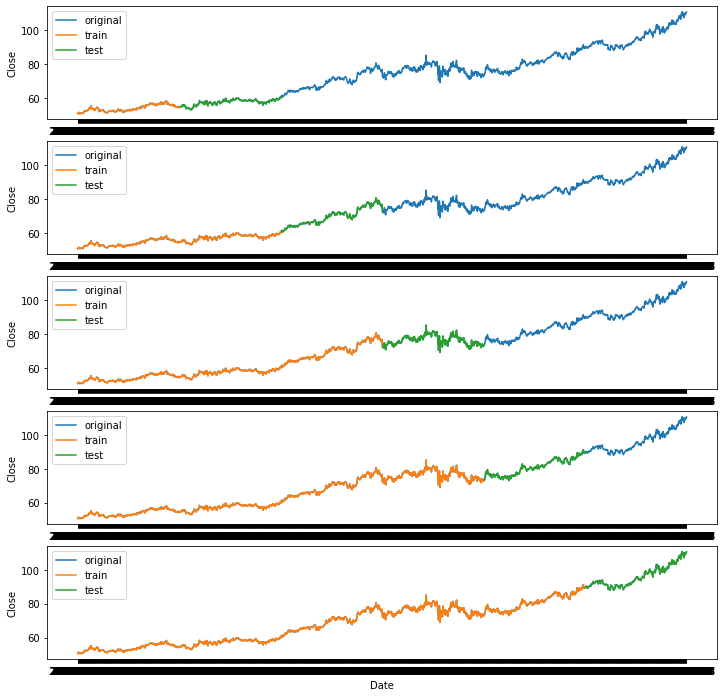

In [13]:
fig, axes = plt.subplots(5, 1, figsize = (12,12))

for i, (train_index,test_index) in enumerate (folds.split(df_kabu_train)):
    print('train: \n',df_kabu_train.iloc[train_index])
    print('test: \n',df_kabu_train.iloc[test_index])
    print('------------')
    sns.lineplot(data = df_kabu_train, x = 'Date', y = 'Close',ax = axes[i],label ='original')
    sns.lineplot(data = df_kabu_train.iloc[train_index], x = 'Date', y = 'Close',ax = axes[i],label ='train')
    sns.lineplot(data = df_kabu_train.iloc[test_index], x = 'Date', y = 'Close',ax = axes[i],label ='test')

plt.legend()
plt.show()
    

No handles with labels found to put in legend.


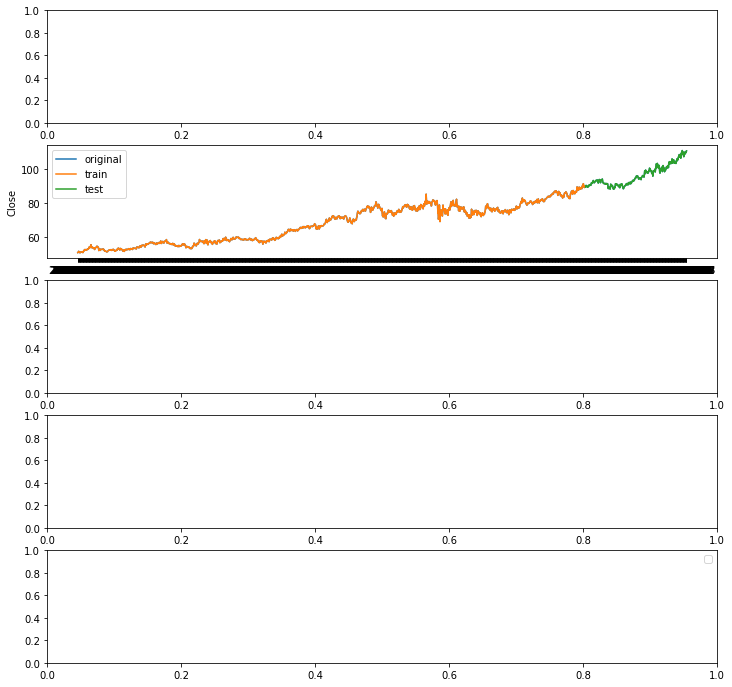

In [12]:
fig, axes = plt.subplots(5, 1, figsize = (12,12))

sns.lineplot(data = df_kabu_train, x = 'Date', y = 'Close',ax = axes[1],label ='original')
sns.lineplot(data = df_kabu_train.iloc[train_index], x = 'Date', y = 'Close',ax = axes[1],label ='train')
sns.lineplot(data = df_kabu_train.iloc[test_index], x = 'Date', y = 'Close',ax = axes[1],label ='test')

plt.legend()
plt.show()